In [103]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_excel("Values Pulse Check 2023_Overall_Raw Data.xlsx")
df = df.iloc[1:].reset_index(drop=True)

In [104]:
print("Total divisions:", df["Q24_1"].nunique())
df["Q24_1"].unique()

Total divisions: 44


array(['Finance', 'Strategy', 'IT', 'Logistics', 'Procurement',
       'Merchandise Management', 'Global eCommerce', 'Other',
       'Human Resources', 'Construction & Facility Management',
       'Retail Store', 'Controlling', 'Retail Operations',
       'Sustainability', 'Legal', 'No answer',
       'Product Development & Operations', 'Business Unit BOSS Menswear',
       'Corporate Communications', 'Marketing & Brand Communications',
       'Business Unit HUGO', 'Business Units Ticino', 'Global Retail',
       'eCommerce', 'Business Unit BOSS Womenswear', 'Internal Audit',
       'Technical Center', 'Retail Management', 'Licences',
       'Sourcing & Production', 'Store Design & Visual Merchandising',
       'Materials Management', 'Global Travel Retail', 'Retail Services',
       'Digital Excellence', 'Production Izmir - Jersey',
       'Production Izmir - Womenswear',
       'Production Izmir- Menswear (Suit)', 'Production Izmir - Shirt',
       'Real Estate Management', "Log. Dis

Q8 TRUST
Q10 ENTRP.
12 YOUTHFUL SPIRIT
14 SIMPLICITY & QUALITY
16 TEAM MENTALITY
18 PERSONAL OWNERSHIP

Q24_1 Division

In [105]:
# Columns that talk about how well a certain quality is reflected in the division
qualities_columns = ['Q8', 'Q10', 'Q12', 'Q14', 'Q16', 'Q18']
division_column = 'Q24_1'
df_subset = df[qualities_columns + [division_column]]

null_values = df_subset.isnull().sum()

print("Shape: ", df.shape)
print("Null values in each column:\n", null_values)

# Define a mapping from categorical responses to numerical values
response_mapping = {
    'Very poor': 1,
    'Poor': 2,
    'Satisfactory': 3,
    'Well': 4,
    'Very well': 5,
    'No answer': None
}

Shape:  (3504, 40)
Null values in each column:
 Q8       436
Q10      439
Q12      446
Q14      453
Q16      452
Q18      461
Q24_1    723
dtype: int64


In [106]:
df_subset.dropna(inplace=True)
null_values = df_subset.isnull().sum()

print("Shape: ", df_subset.shape)
print("Null values in each column:\n", null_values)


Shape:  (2753, 7)
Null values in each column:
 Q8       0
Q10      0
Q12      0
Q14      0
Q16      0
Q18      0
Q24_1    0
dtype: int64


In [107]:
df_subset

,Q8,Q10,Q12,Q14,Q16,Q18,Q24_1
0,Satisfactory,Satisfactory,Well,Satisfactory,Well,Poor,Finance
1,Very well,Well,Very well,Well,Satisfactory,Well,Strategy
2,No answer,Very poor,Very poor,Very poor,Very poor,Very poor,IT
3,Poor,Well,Poor,Satisfactory,Very poor,Poor,Logistics
4,Very well,Very well,Very well,Well,Very well,Well,Procurement
...,...,...,...,...,...,...,...
3459,Satisfactory,No answer,No answer,No answer,No answer,No answer,No answer
3460,Very well,Well,Very well,Very well,Very well,Very well,Business Unit HUGO
3461,Very well,Well,Very well,Very well,Very well,Very well,Controlling
3462,Well,Well,Well,Well,Well,Well,Retail Store


In [108]:
# Convert categorical responses to numerical values for quality columns
for quality in qualities_columns:
    df_subset[quality] = df_subset[quality].map(response_mapping)

# df_subset.dropna(inplace=True)

In [109]:
# Group by Division and calculate the mean for each quality
division_analysis = df_subset.groupby(division_column).mean().reset_index()

# Plotting
# plt.figure(figsize=(14, 8))

# # Plot each quality
# for quality in qualities_columns:
#     plt.figure(figsize=(10, 6))
#     sns.barplot(x=division_column, y=quality, data=division_analysis, palette='viridis')
#     plt.title(f'Average Perception of {quality} by Division')
#     plt.xlabel('Division')
#     plt.ylabel('Average Perception')
#     plt.xticks(rotation=45)
#     plt.tight_layout()
#     plt.show()


In [110]:
division_analysis

,Q24_1,Q8,Q10,Q12,Q14,Q16,Q18
0,Business Unit BOSS Menswear,3.780000,3.735516,3.807500,3.866834,3.831658,3.808564
1,Business Unit BOSS Womenswear,3.775000,3.765432,3.862500,3.950617,3.604938,3.777778
2,Business Unit HUGO,3.984848,3.815385,4.076923,3.938462,4.109375,4.000000
3,Business Units Ticino,3.767677,3.656566,3.683673,3.646465,3.818182,3.787879
4,CRM,3.714286,3.714286,3.142857,3.428571,3.428571,3.714286
5,Construction & Facility Management,4.074074,3.481481,3.444444,3.370370,3.851852,3.777778
6,Controlling,3.900000,3.842105,3.650000,3.450000,3.650000,3.947368
7,Corporate Communications,3.833333,3.166667,4.166667,3.500000,3.666667,3.500000
8,Digital Excellence,5.000000,4.333333,4.666667,4.000000,4.333333,4.000000
9,Finance,3.913793,3.421053,3.440678,3.610169,3.694915,3.689655


In [111]:
# Top 5 and bottom 5 performing divisions
for col in qualities_columns:
    print(f"Top 5 divisions for {col}:")
    print(division_analysis[['Q24_1', col]].sort_values(by=col, ascending=False).head(5))
    print(f"\nBottom 5 divisions for {col}:")
    print(division_analysis[['Q24_1', col]].sort_values(by=col).head(6))
    print("\n")

Top 5 divisions for Q8:
                    Q24_1        Q8
8      Digital Excellence  5.000000
16     Investor Relations  5.000000
33      Retail Management  4.285714
37  Sourcing & Production  4.200000
22   Materials Management  4.176471

Bottom 5 divisions for Q8:
                                     Q24_1        Q8
40                          Sustainability  3.222222
24                               No answer  3.225806
19  Log. Distrib. Centers/Raw Mat. W'house  3.291667
17                                   Legal  3.454545
20                               Logistics  3.464912
30           Production Izmir - Womenswear  3.469697


Top 5 divisions for Q10:
                 Q24_1       Q10
8   Digital Excellence  4.333333
33   Retail Management  4.190476
18            Licences  4.000000
42       Travel Retail  4.000000
16  Investor Relations  4.000000

Bottom 5 divisions for Q10:
                       Q24_1       Q10
40            Sustainability  2.750000
20                 Logistics 

In [112]:
division_analysis.head()

,Q24_1,Q8,Q10,Q12,Q14,Q16,Q18
0,Business Unit BOSS Menswear,3.780000,3.735516,3.807500,3.866834,3.831658,3.808564
1,Business Unit BOSS Womenswear,3.775000,3.765432,3.862500,3.950617,3.604938,3.777778
2,Business Unit HUGO,3.984848,3.815385,4.076923,3.938462,4.109375,4.000000
3,Business Units Ticino,3.767677,3.656566,3.683673,3.646465,3.818182,3.787879
4,CRM,3.714286,3.714286,3.142857,3.428571,3.428571,3.714286


In [113]:
division_analysis.columns = ['DIVISION', 'TRUST', 'ENTREPRENEURIAL SPIRIT', 'YOUTHFUL SPIRIT', 'SIMPLICITY & QUALITY', 'TEAM MENTALITY', 'PERSONAL OWNERSHIP' ]

In [114]:
division_analysis.head()

,DIVISION,TRUST,ENTREPRENEURIAL SPIRIT,YOUTHFUL SPIRIT,SIMPLICITY & QUALITY,TEAM MENTALITY,PERSONAL OWNERSHIP
0,Business Unit BOSS Menswear,3.780000,3.735516,3.807500,3.866834,3.831658,3.808564
1,Business Unit BOSS Womenswear,3.775000,3.765432,3.862500,3.950617,3.604938,3.777778
2,Business Unit HUGO,3.984848,3.815385,4.076923,3.938462,4.109375,4.000000
3,Business Units Ticino,3.767677,3.656566,3.683673,3.646465,3.818182,3.787879
4,CRM,3.714286,3.714286,3.142857,3.428571,3.428571,3.714286


In [117]:
division_analysis = division_analysis[division_analysis['DIVISION'] != 'No answer']


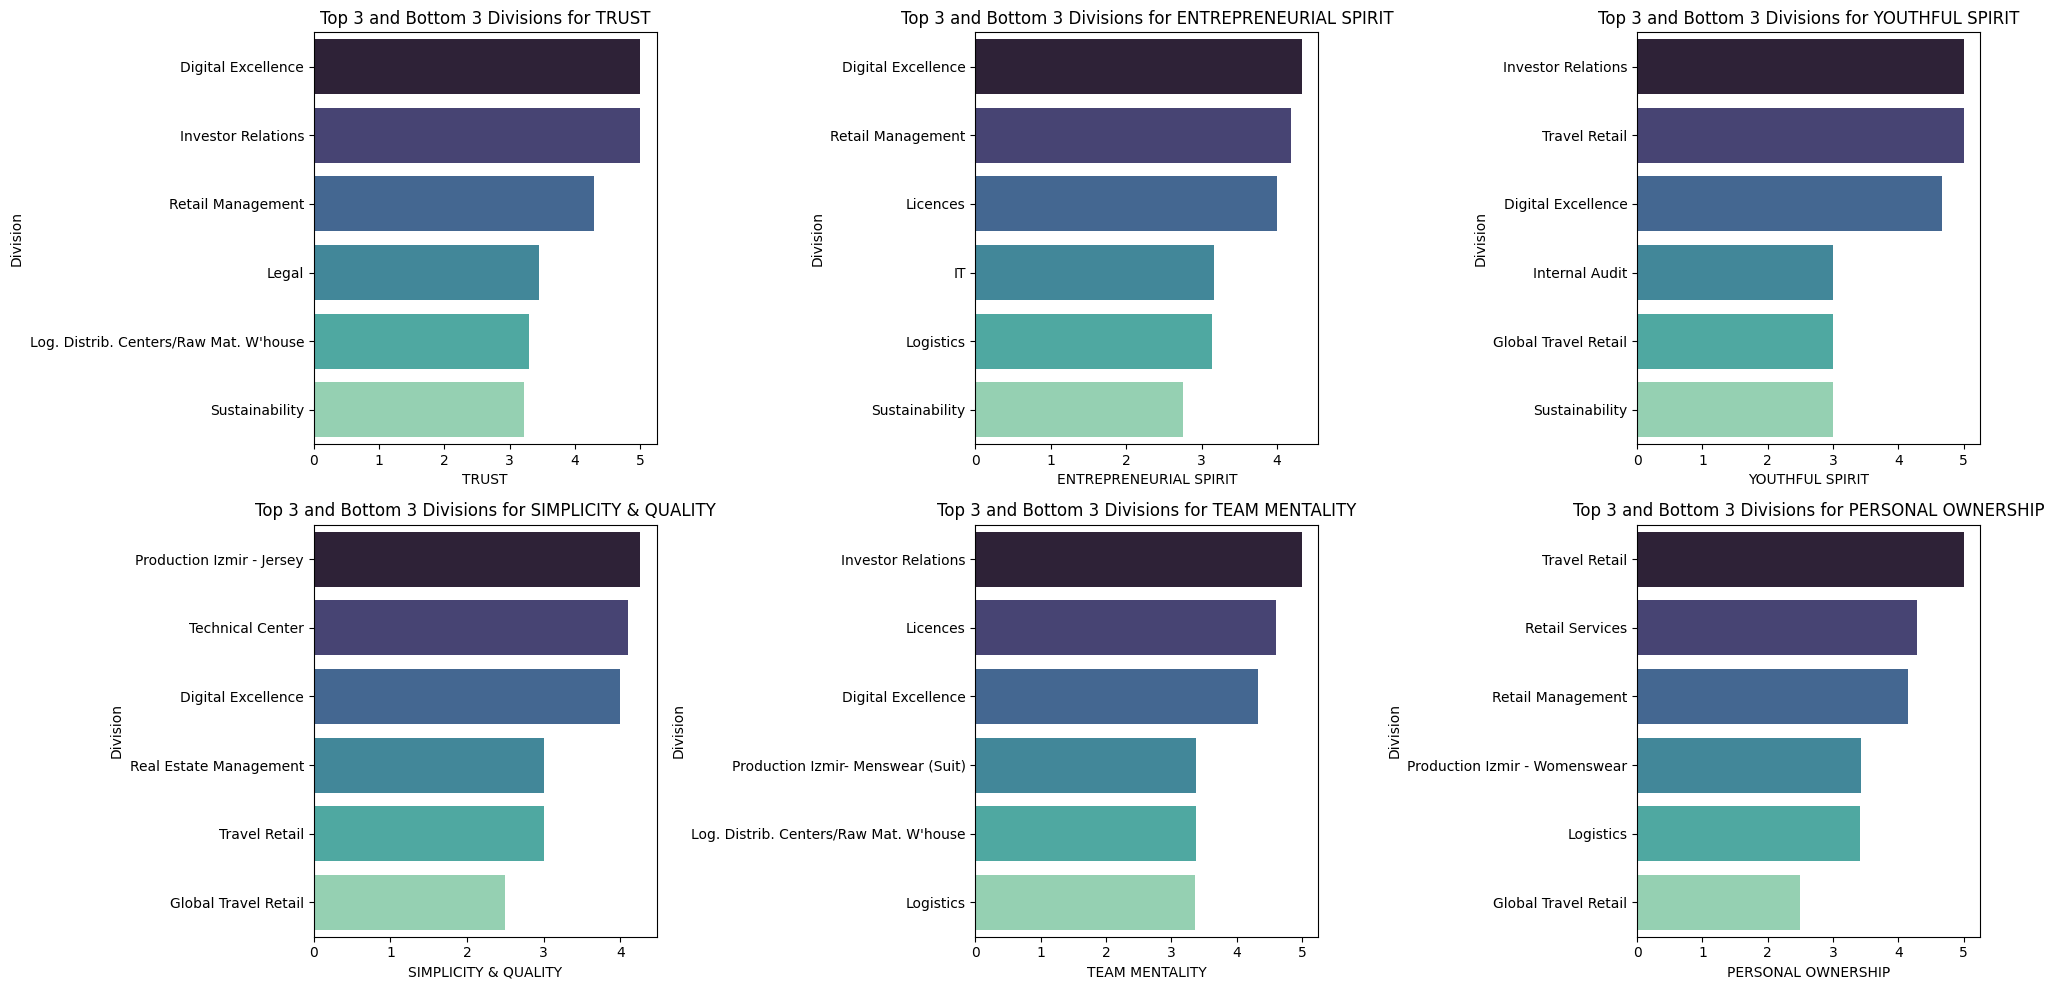

In [118]:
# Function to get top 5 and bottom 6 for each quality (column)
def get_top_bottom(df, column):
    sorted_df = df[['DIVISION', column]].sort_values(by=column, ascending=False)
    top_5 = sorted_df.head(3)
    bottom_6 = sorted_df.tail(3)
    combined_df = pd.concat([top_5, bottom_6])
    return combined_df

# Create subplots (2 rows, 3 columns)
fig, ax = plt.subplots(2, 3, figsize=(20, 10))

# Loop through each column and assign each plot to a subplot
for i, col in enumerate(['TRUST', 'ENTREPRENEURIAL SPIRIT', 'YOUTHFUL SPIRIT', 'SIMPLICITY & QUALITY', 'TEAM MENTALITY', 'PERSONAL OWNERSHIP' ]):  # Loop over qualities columns list
    # Get top 5 and bottom 6 for the current column
    top_bottom_df = get_top_bottom(division_analysis, col)
    
    # Plot in the corresponding subplot
    sns.barplot(x=col, y='DIVISION', data=top_bottom_df, palette="mako", ax=ax[i//3, i%3])
    ax[i//3, i%3].set_title(f"Top 3 and Bottom 3 Divisions for {col}")
    ax[i//3, i%3].set_xlabel(col)
    ax[i//3, i%3].set_ylabel('Division')

# Adjust layout for readability
plt.tight_layout()
plt.show()


In [99]:
logistics_df = df_subset[df_subset[division_column] == 'Logistics']

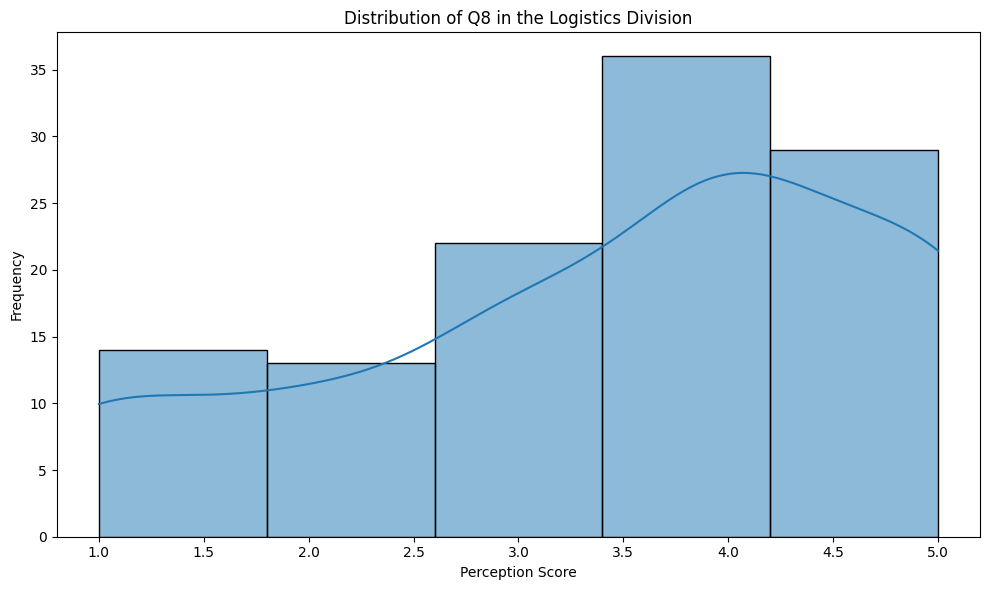

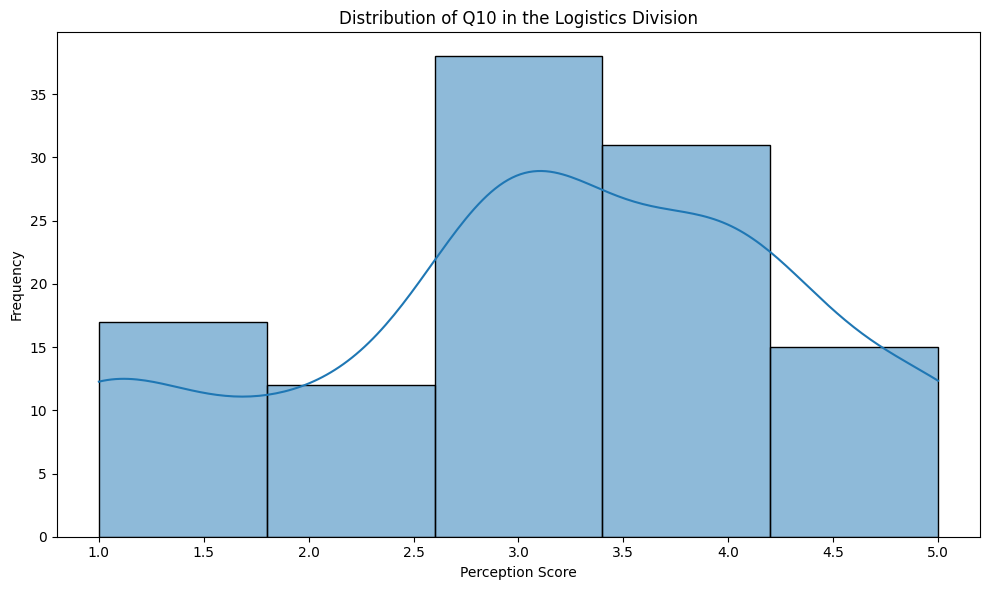

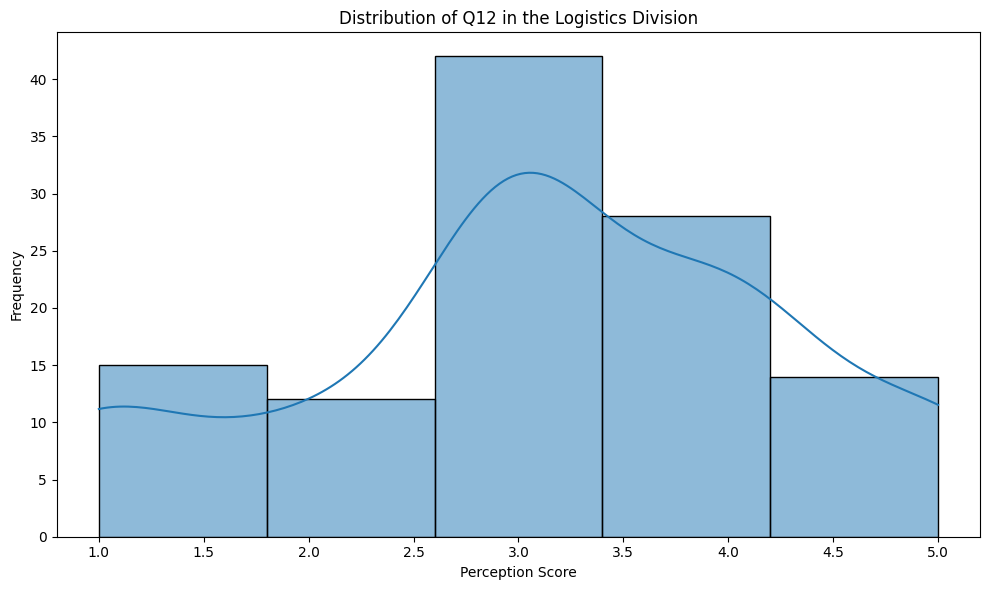

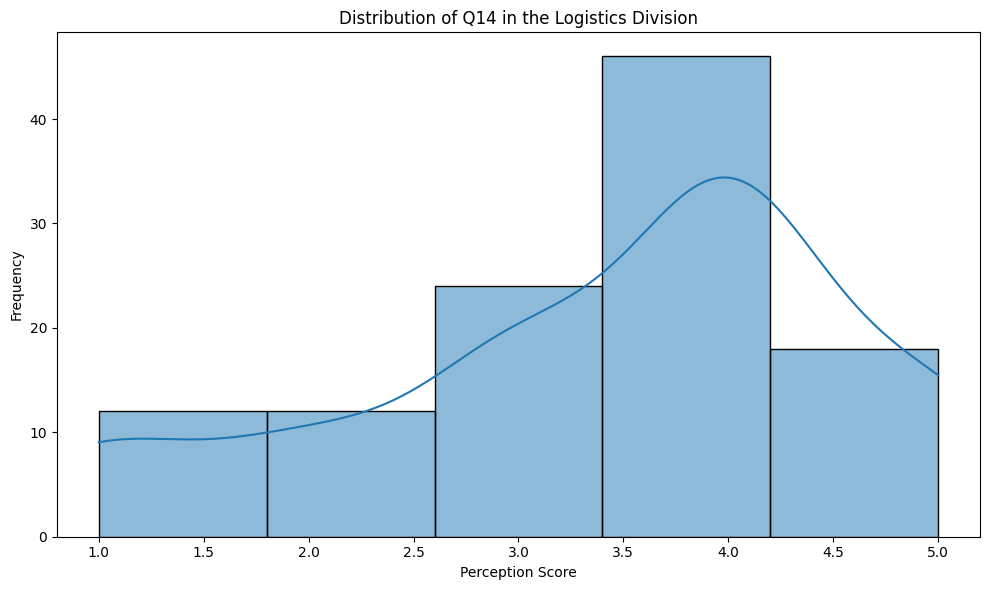

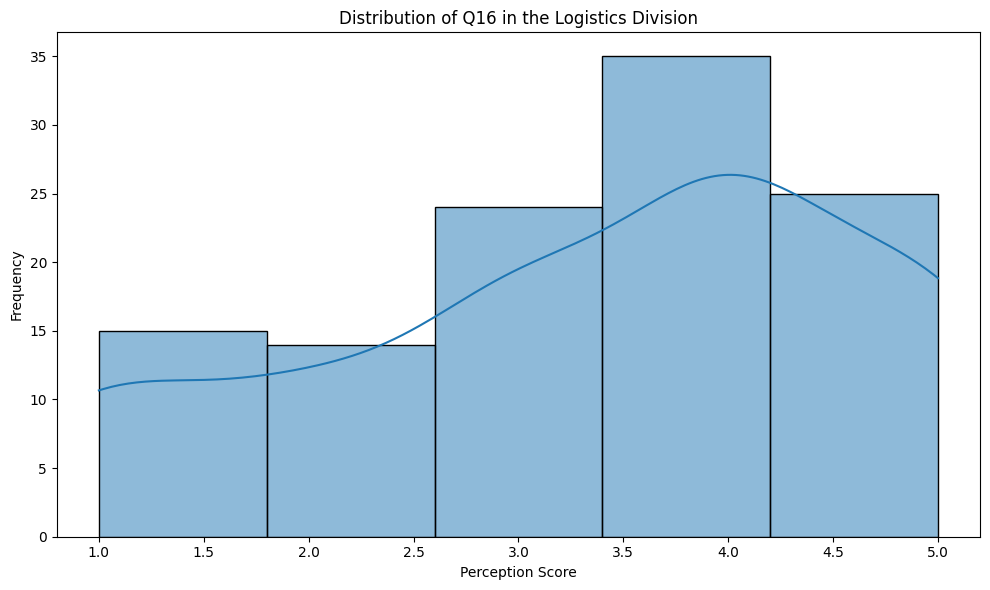

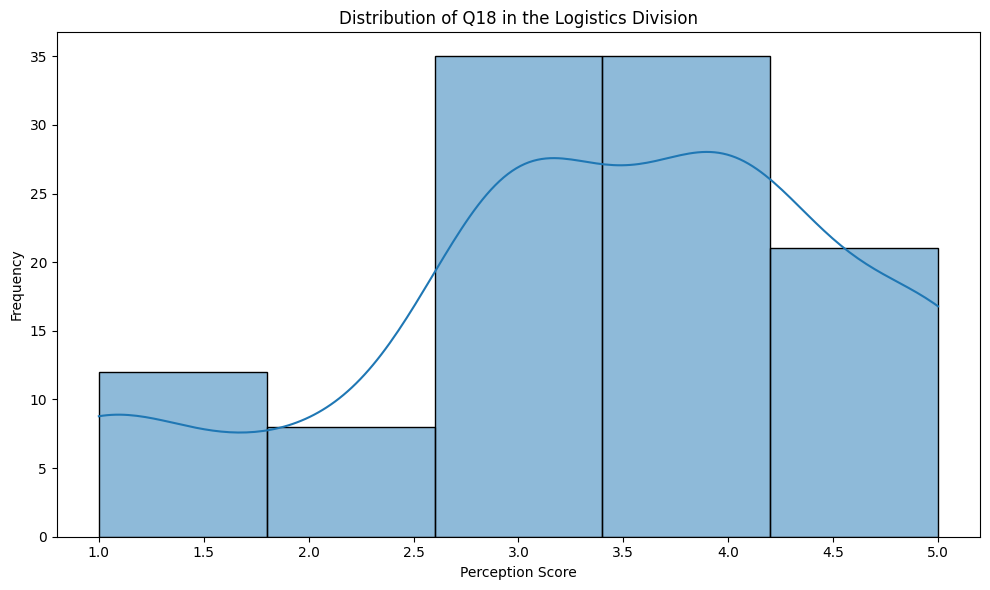

In [100]:
for quality in qualities_columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(logistics_df[quality], bins=5, kde=True, palette='viridis')
    plt.title(f'Distribution of {quality} in the Logistics Division')
    plt.xlabel('Perception Score')
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()

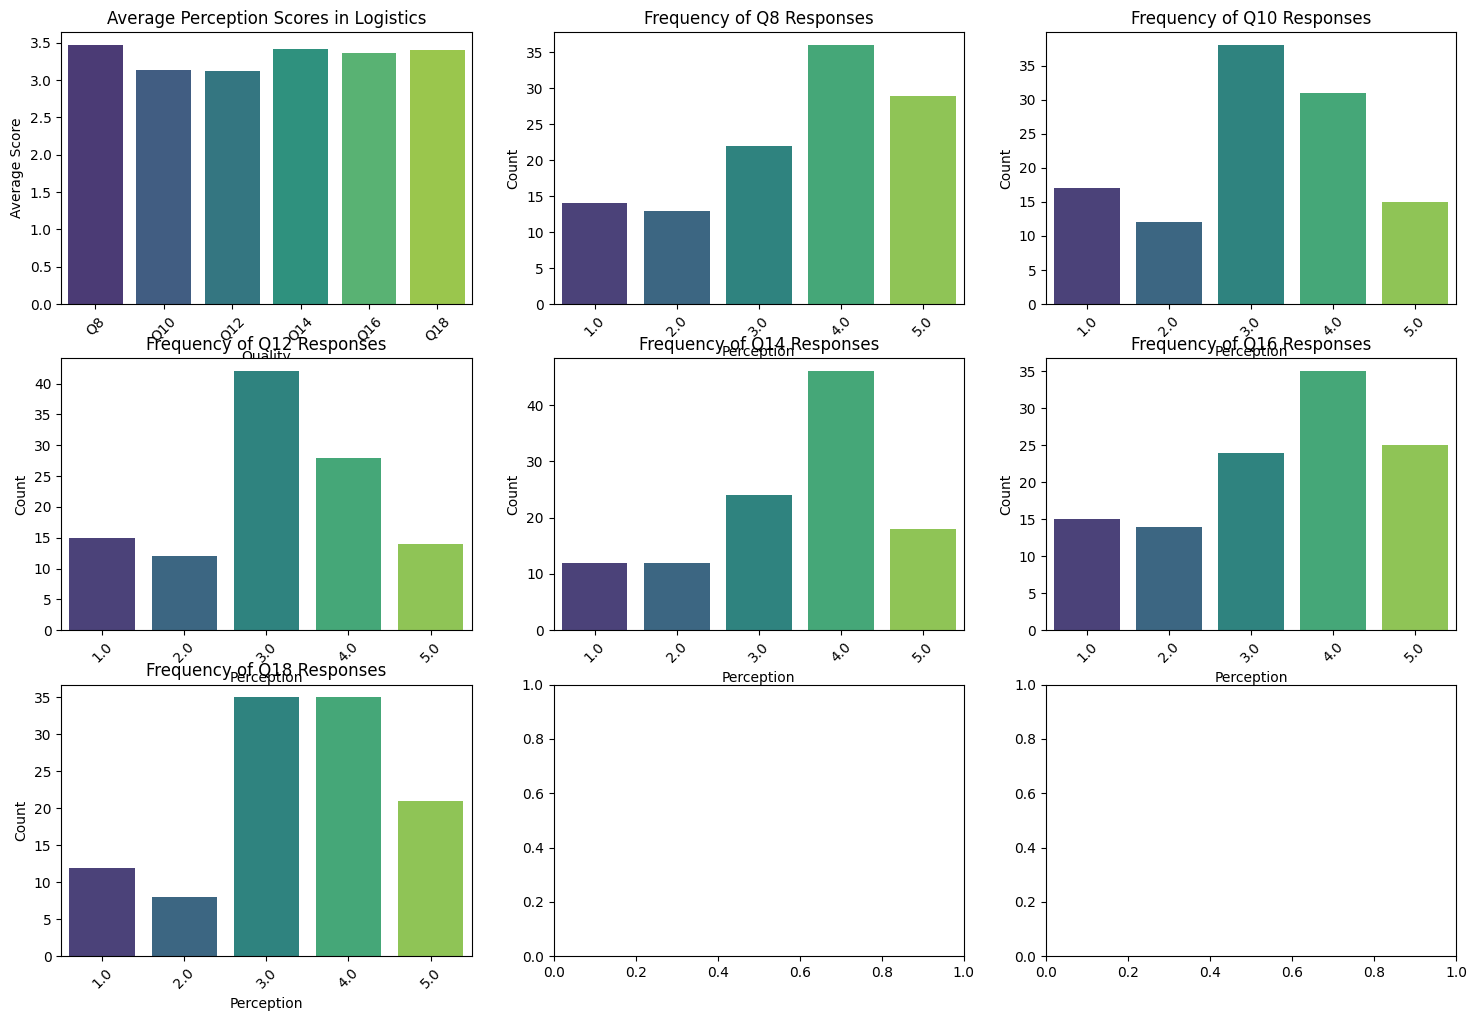

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

In [101]:
average_scores = logistics_df[qualities_columns].mean()

# Melt the dataframe to long format for better plotting
logistics_long_df = logistics_df.melt(id_vars=[division_column], value_vars=qualities_columns,
                                      var_name='Quality', value_name='Perception')

fig, axs = plt.subplots(3, 3, figsize=(18, 12))  # 2 rows and 3 columns

# Flatten the 2D array of axes for easier iteration
axs = axs.flatten()

# Plot average perception scores
sns.barplot(x=average_scores.index, y=average_scores.values, palette='viridis', ax=axs[0])
axs[0].set_title('Average Perception Scores in Logistics')
axs[0].set_xlabel('Quality')
axs[0].set_ylabel('Average Score')
axs[0].tick_params(axis='x', rotation=45)

# Plot count of responses for each quality
for i, quality in enumerate(qualities_columns):
    plt.figure(figsize=(10, 6))
    sns.countplot(data=logistics_long_df[logistics_long_df['Quality'] == quality], x='Perception', palette='viridis', ax=axs[i + 1])
    axs[i + 1].set_title(f'Frequency of {quality} Responses')
    axs[i + 1].set_xlabel('Perception')
    axs[i + 1].set_ylabel('Count')
    axs[i + 1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

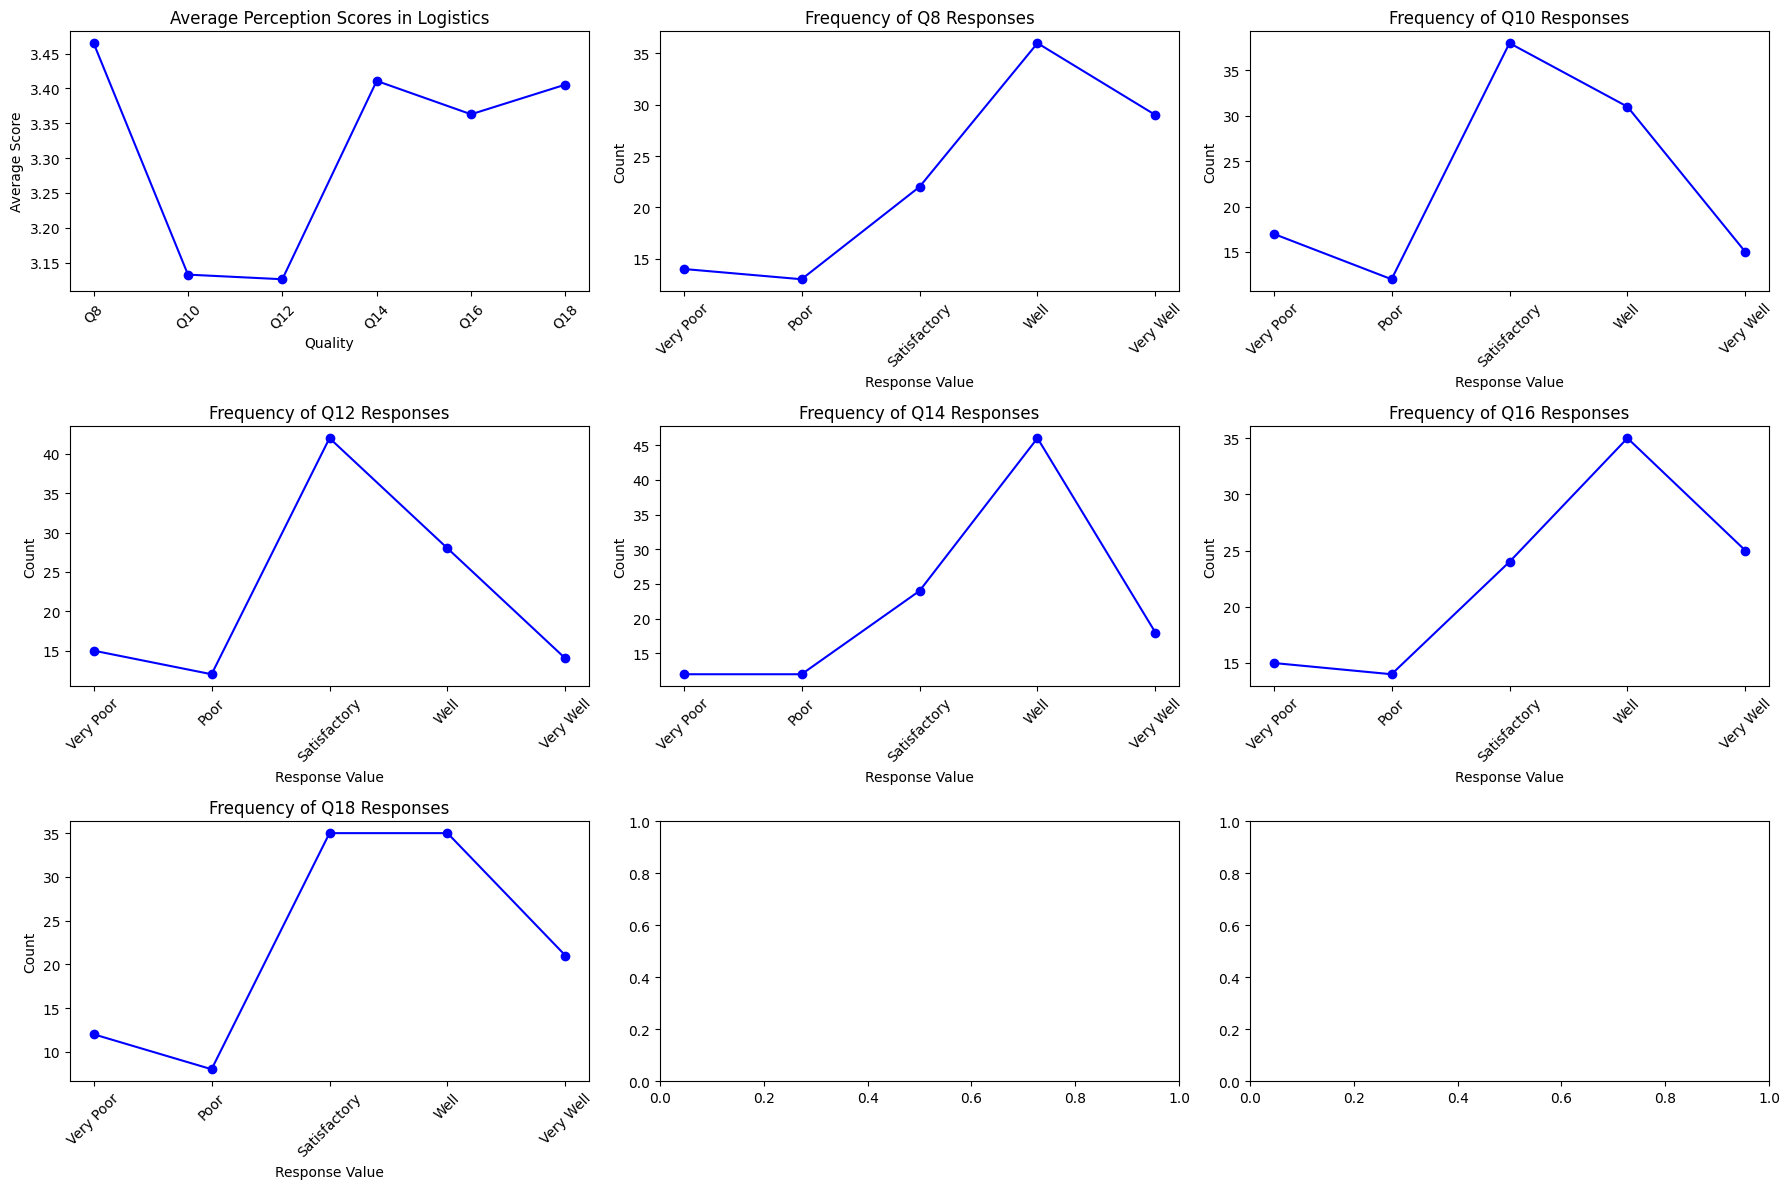

In [102]:
average_scores = logistics_df[qualities_columns].mean()

# Melt the dataframe to long format for better plotting
logistics_long_df = logistics_df.melt(id_vars=[division_column], value_vars=qualities_columns,
                                      var_name='Quality', value_name='Perception')

# Set up the subplots
fig, axs = plt.subplots(3, 3, figsize=(18, 12))  # 3 rows and 3 columns
axs = axs.flatten()

# Plot average perception scores using line plot
axs[0].plot(average_scores.index, average_scores.values, marker='o', linestyle='-', color='b')
axs[0].set_title('Average Perception Scores in Logistics')
axs[0].set_xlabel('Quality')
axs[0].set_ylabel('Average Score')
axs[0].tick_params(axis='x', rotation=45)

# Plot frequency of each response value for each quality using line plots
response_counts = logistics_long_df.groupby(['Quality', 'Perception']).size().unstack().fillna(0)

for i, quality in enumerate(qualities_columns):
    if quality in response_counts.index:
        response_freq = response_counts.loc[quality]
        axs[i + 1].plot(response_freq.index, response_freq.values, marker='o', linestyle='-', color='b')
        axs[i + 1].set_title(f'Frequency of {quality} Responses')
        axs[i + 1].set_xlabel('Response Value')
        axs[i + 1].set_ylabel('Count')
        axs[i + 1].set_xticks([1, 2, 3, 4, 5])
        axs[i + 1].set_xticklabels(['Very Poor', 'Poor', 'Satisfactory', 'Well', 'Very Well'])
        axs[i + 1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()